In [1]:
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn import ensemble
from sklearn import metrics
sns.mpl.style.use('ggplot')

/Users/mosky/.local/share/virtualenvs/Practicing_Python_3-G_R8ux9l/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
fair_df = sm.datasets.fair.load_pandas().data

In [3]:
fair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
fair_df.loc[:, :'occupation_husb'].head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [5]:
(fair_df.affairs > 0).head()

0    True
1    True
2    True
3    True
4    True
Name: affairs, dtype: bool

In [6]:
X = fair_df.loc[:, :'occupation_husb']
y = fair_df.affairs > 0

In [7]:
m = ensemble.RandomForestClassifier()
m.fit(X, y)
# It will cause overfitting. Split your dataset when seriously model training.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
y_hat = m.predict(X)

In [9]:
y_hat

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [10]:
print(metrics.classification_report(y, y_hat))

             precision    recall  f1-score   support

      False       0.92      0.97      0.94      4313
       True       0.92      0.83      0.87      2053

avg / total       0.92      0.92      0.92      6366



In [11]:
c = metrics.confusion_matrix(y, y_hat)

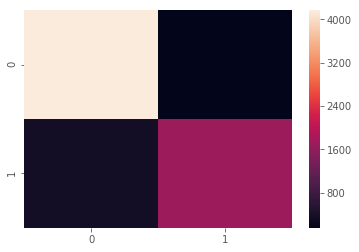

In [12]:
sns.heatmap(c)
# row is actual
# col is predicted

In [13]:
c

array([[4165,  148],
       [ 345, 1708]])

In [14]:
4156+157

4313

In [15]:
4156/(4156+157)

0.9635984233712034

In [16]:
157/(4156+157)

0.03640157662879666

In [17]:
c

array([[4165,  148],
       [ 345, 1708]])

In [18]:
c.sum(axis=1)

array([4313, 2053])

In [19]:
c.sum(axis=1, keepdims=True)

array([[4313],
       [2053]])

In [20]:
c/c.sum(axis=1, keepdims=True)

array([[ 0.96568514,  0.03431486],
       [ 0.16804676,  0.83195324]])

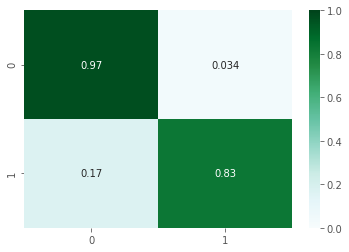

In [21]:
sns.heatmap(c/c.sum(axis=1, keepdims=True), vmin=0, vmax=1, annot=True, cmap='BuGn')
# c[actual, predicted]
# c[0, 1] = false positive rate = type I error rate
# c[0, 0] = true negative rate = specificity (特異度)
# c[1, 0] = false negative rate = type II error rate
# c[1, 1] = true positive rate = sensitivity (靈敏度)

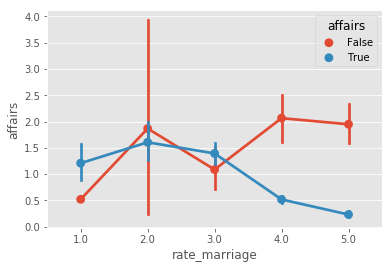

In [22]:
sns.pointplot(x=fair_df['rate_marriage'], y=fair_df['affairs'], hue=(y == y_hat))